In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("Pastel1")

In [2]:
df = pd.read_csv("C:\\Users\\A7\\Desktop\\students-performance\\StudentsPerformance.csv")
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
173,female,group C,associate's degree,standard,none,63,67,70
580,female,group D,some high school,standard,none,81,97,96
816,female,group A,bachelor's degree,standard,none,45,59,64
451,female,group E,some college,standard,none,100,92,97


In [3]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000,NaN,NaN,NaN,66.089,15.1631,0,57,66,77,100
reading score,1000,NaN,NaN,NaN,69.169,14.6002,17,59,70,79,100
writing score,1000,NaN,NaN,NaN,68.054,15.1957,10,57.75,69,79,100


In [4]:
df.rename(columns = {"math score":"math_score",
                     "reading score":"reading_score",
                     "writing score":"writing_score",
                     "race/ethnicity":"group"},inplace = True)

<AxesSubplot:xlabel='group', ylabel='count'>

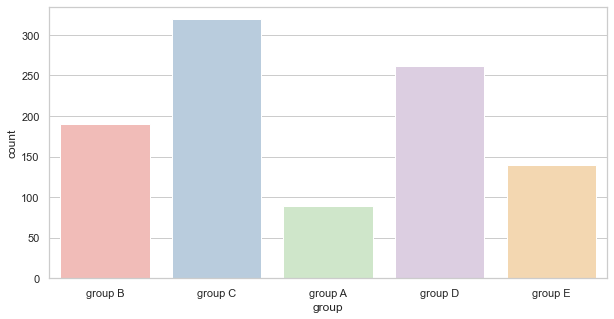

In [5]:
# basix Countplot
fig , axes = plt.subplots(figsize=(10,5))
sns.countplot(data=df,x=df["group"],ax=axes)

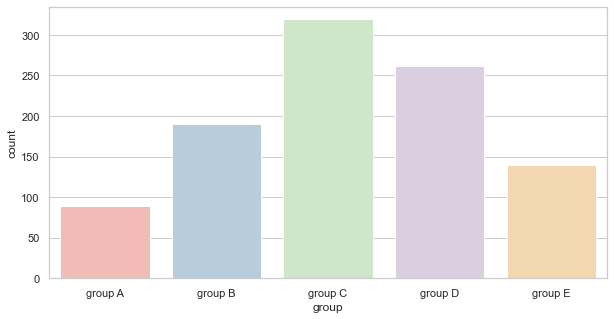

In [6]:
fig , ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df["group"],order=sorted(df["group"].unique()) , ax=ax,data=df)
plt.show()

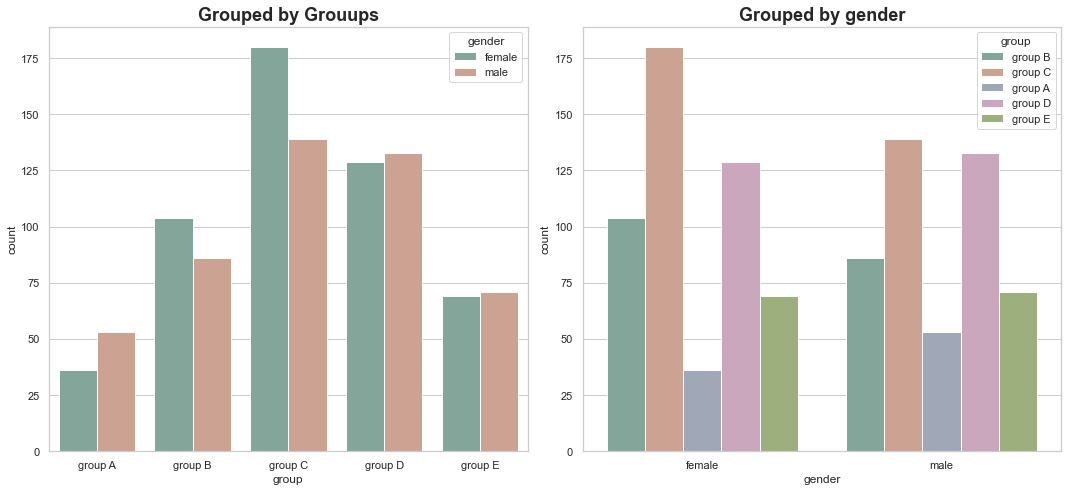

In [7]:
sns.set_palette("Set2",desat=.5)
fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.countplot(x= df["group"], data=df, order=sorted(df["group"].unique()),
              hue=df["gender"],ax=ax[0] )

sns.countplot(x = df["gender"], data=df,hue=df["group"],ax=ax[1])
ax[0].set_title("Grouped by Grouups" , fontsize=18, fontweight="bold")
ax[1].set_title("Grouped by gender", fontsize=18, fontweight="bold")
plt.tight_layout();

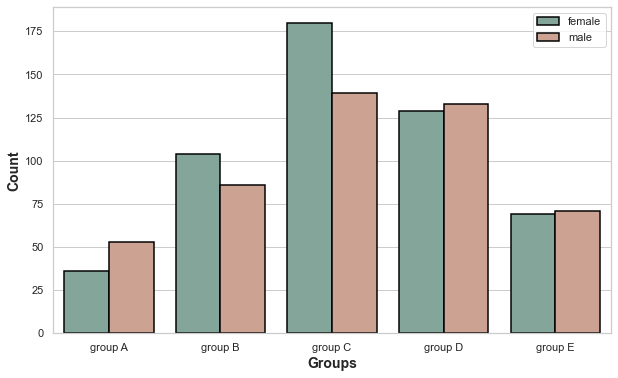

In [8]:
fig,ax = plt.subplots(figsize=(10,6),sharex=True)
sns.countplot(x=df["group"],data=df,
              order=sorted(df["group"].unique()),
             hue=df["gender"],edgecolor=(0,0,0)
              ,linewidth=1.5,ax=ax)
plt.xlabel("Groups",fontsize=14,fontweight="bold")
plt.ylabel("Count",fontsize=14,fontweight="bold")
plt.legend()


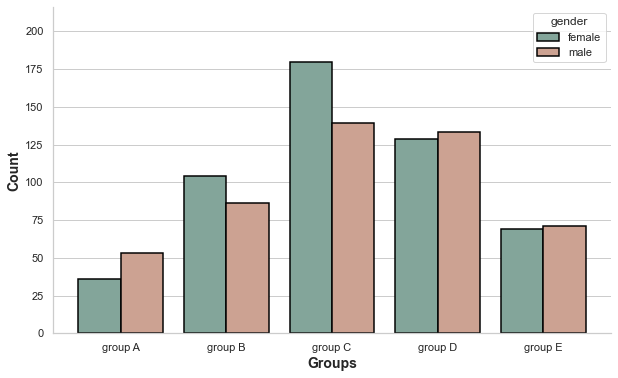

In [9]:
fig,ax= plt.subplots(figsize=(10,6))
sns.countplot(x=df["group"],data=df,
             order=sorted(df["group"].unique()),
              hue=df["gender"],ax=ax,
               edgecolor=(0,0,0),linewidth=1.5)
plt.xlabel("Groups",fontsize=14,fontweight="bold")
plt.ylabel("Count",fontsize=14,fontweight="bold")
ax.margins(0.05,0.2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

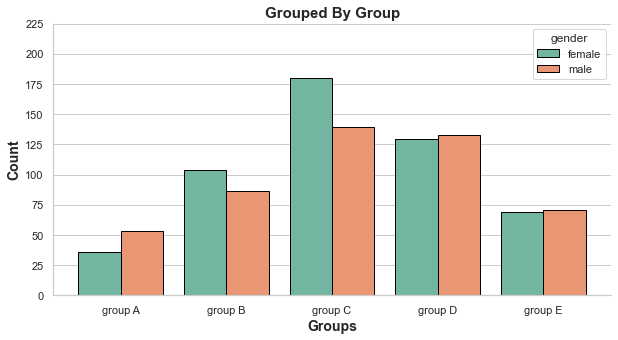

In [10]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df["group"],data=df,ax=ax,
             order=sorted(df["group"].unique()),
             hue=df["gender"],
             edgecolor=(0,0,0),linewidth=1,palette="Set2")
ax.margins(.05,0.25)

ax.set_title("Grouped By Group",fontsize=15,fontweight="semibold",loc="center")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlabel("Groups",fontsize=14,fontweight="bold")
plt.ylabel("Count",fontsize=14,fontweight="bold")

#ax.yaxis.label.set_size(16)
#ax.xaxis.label.set_size(16)
plt.show()

In [11]:
df.sample()

,gender,group,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
784,male,group C,bachelor's degree,standard,completed,91,81,79


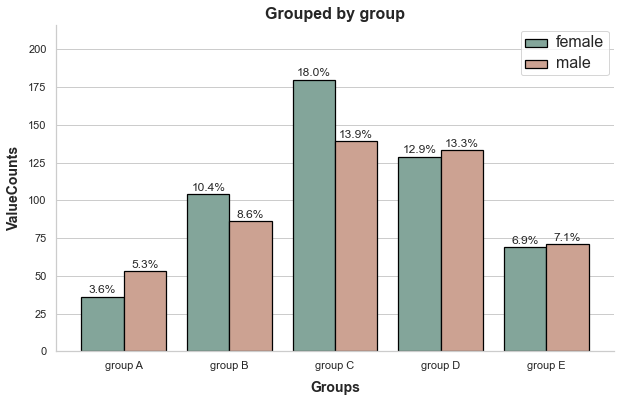

In [19]:
fif,ax = plt.subplots(figsize=(10,6))
sns.countplot(x=df["group"] ,data=df ,ax=ax,
             order=sorted(df["group"].unique()),
             hue=df["gender"],edgecolor=(0,0,0),linewidth=1.25)
              #facecolor=(0, 0, 0, 0)

plt.title("Grouped by group", fontsize=16,fontweight="bold" , loc="center")
plt.xlabel("Groups",fontsize=14,labelpad=10,fontweight="bold")
plt.ylabel("ValueCounts",fontsize=14,labelpad=7,fontweight="bold")

ax.margins(.05,.2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for b in ax.patches:
    x = b.get_bbox().get_points()[:,0]
    y= b.get_bbox().get_points()[1,1]
    ax.annotate(f'{100*y/len(df):.4}%', (x.mean(), y+1), ha='center', va='bottom')

legend = ax.legend()  
plt.setp(legend.texts, fontsize=16);